In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
import warnings
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve


In [2]:

df=pd.read_csv("Mushrooms.csv")



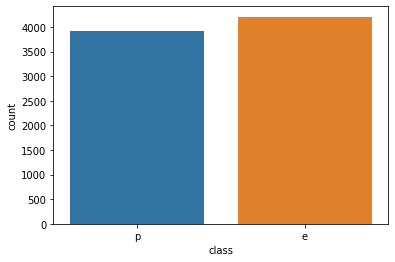

In [3]:
warnings.filterwarnings("ignore")
sns.countplot(df["class"])
plt.show()

In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<AxesSubplot:>

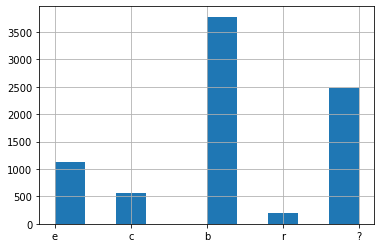

In [5]:
df["stalk-root"].hist()

In [6]:
df["stalk-shape"].value_counts()

t    4608
e    3516
Name: stalk-shape, dtype: int64

In [7]:
df["gill-size"].value_counts()

b    5612
n    2512
Name: gill-size, dtype: int64

In [8]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
p

NameError: name 'p' is not defined

In [ ]:
df.drop("veil-type",axis=1,inplace=True)

In [ ]:
X=df.drop("class",axis=1)
y=df["class"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)


In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(X_train.corr(),linewidth=1,cmap="Purples",annot=True,annot_kws={"size":7})
plt.yticks(rotation=0)
plt.show()

In [ ]:
print(X_train[['gill-color']]) 
print(y_train)

In [ ]:
features_list = X.columns.values
feature_importance = dtc.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8,7))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
X_train.shape,y_train.shape
X_train.shape,y_train.shape

In [ ]:
LE=LabelEncoder()
for col in X_train.columns:
    X_train[col]=LE.fit_transform(X_train[col])

In [ ]:

for col in X_test.columns:
    X_test[col]=LE.fit_transform(X_test[col])

In [ ]:
from sklearn.

In [ ]:
y_train=pd.get_dummies(y_train,drop_first=True)
y_test=pd.get_dummies(y_test,drop_first=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
y_pred_dtc=dtc.predict(X_test)
print(score)

In [ ]:
cm=confusion_matrix(y_test,y_pred_dtc)
x_axis_labels=["Edible","Poisonous"]
y_axis_labels=["Edible","Poisonous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrik for Decision Tree Classifier")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
score=lr.score(X_test,y_test)
y_pred_lr=lr.predict(X_test)
print(score)

In [ ]:
cm=confusion_matrix(y_test,y_pred_lr)
x_axis_labels=["Edible","Poisonous"]
y_axis_labels=["Edible","Poisonous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrik for Decision Tree Classifier")
plt.show()

# Feature Selection

In [ ]:
df.head()

In [ ]:
X=df[['gill-color', 'spore-print-color', 'population','gill-size', 'stalk-root','bruises','stalk-shape']]
y=df[['class']]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


In [ ]:
for col in X_train.columns:
    X_train[col]=LE.fit_transform(X_train[col])
for col in X_test.columns:
    X_test[col]=LE.fit_transform(X_test[col])
y_train=pd.get_dummies(y_train,drop_first=True)
y_test=pd.get_dummies(y_test,drop_first=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
score=dtc.score(X_test,y_test)
y_pred_dtc=dtc.predict(X_test)
print(score)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
score=lr.score(X_test,y_test)
y_pred_lr=lr.predict(X_test)
print(score)

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
score=svc_model.score(X_test,y_test)
y_pred_svc_model=svc_model.predict(X_test)
print(score)


In [ ]:
import pickle
pickle.dump(dtc,open("Mushroom_Classification_Model.pkl","wb"))


In [ ]:
load=pickle.load(open("Mushroom_Classification_Model.pkl",rb))
load.predict(X_test)